In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### hypothesis method
To estimate my weight, however my scale is pretty inaccurate, I predict my weight via guessing I gain 1 kilogram everyday due to eating lots of foods. 
Therefore, I make a prediction which based on guess.

But, if prediction is very inaccurate, and how I should get the more accurate weights. We can estimate it! The estimation is consist of different weights of prediction and measurement.

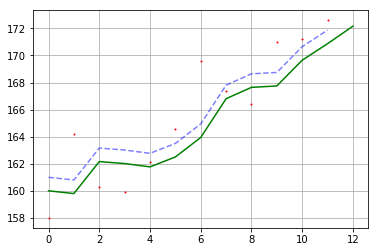

In [29]:
def simple_guess():
    weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
    time_step = 1.0  # day
    scale_factor = 0.4
    initial_guess = 160.
    gain_rate = 1
    
    estimates, predictions = [initial_guess], []
    for idx, w in enumerate(weights):
        prediction = estimates[idx] + gain_rate * time_step
        # update filter
        weight = prediction + scale_factor * (w-prediction)
        
        estimates.append(weight)
        predictions.append(prediction)    
    plt.grid()
    plt.plot(weights, 'ro', markersize=1., color='r')
    plt.plot(estimates, markersize=1., color='g')
    plt.plot(predictions, '--', color='b', alpha=.5)
    plt.show()
simple_guess()

But, this hypothesis is really simple, and gaining factor is always not a constant. Furtheremore, if your guess of initial weight far away from measurement, the accuracy will be terrible. Therefore, we must change this hypothesis to intelligenct method, 'g-h filter'.

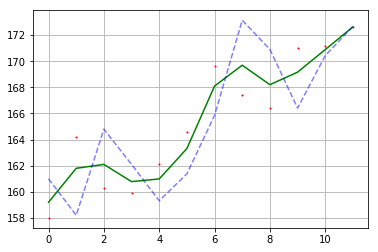

In [28]:
def simple_gh():
    weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
    time_step = 1.0  # day
    estimate = 160.
    gain_rate = 1
    h = 2./3
    g = 6./10
    
    estimates, predictions = [], []
    for w in weights:
        prediction = estimate + (gain_rate*time_step)
        residual = w - prediction
        gain_rate = gain_rate + h * residual/time_step
        estimate = prediction + g * residual
        
        estimates.append(estimate)
        predictions.append(prediction)
    plt.grid()
    plt.plot(weights, 'ro', markersize=1., color='r')
    plt.plot(estimates, color='g')
    plt.plot(predictions, '--', color='b', alpha=.5)
    plt.show()
simple_gh()